In [20]:
#import
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import sklearn
from sklearn import preprocessing
import os, glob
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

### Data Import

In [21]:
#Load file
csv_file = ['test_demand.csv',
 'test_weather.csv',
 'train demand.csv',
 'train weather.csv']

test_demand_df = pd.read_csv(csv_file[0])
test_weather_df = pd.read_csv(csv_file[1])
train_demand_df = pd.read_csv(csv_file[2])
train_weather_df = pd.read_csv(csv_file[3])

In [22]:
#merge dataframe
test_df = pd.merge(test_demand_df, test_weather_df, how='inner', on='Date')
train_df = pd.merge(train_demand_df, train_weather_df, how='inner', on='Date')

#concatenate for all data
all_df = pd.concat([train_df, test_df])
all_df.set_index('Date', inplace=True)

In [23]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, DAY 1 to DAY 77
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALEXANDRA HILL       77 non-null     float64
 1   BENDEMEER            77 non-null     float64
 2   CAIRNHILL            77 non-null     float64
 3   CHATSWORTH           77 non-null     float64
 4   LEONIE HILL          77 non-null     float64
 5   NASSIM               77 non-null     float64
 6   ROBERTSON QUAY       77 non-null     float64
 7   TIONG BAHRU STATION  77 non-null     float64
 8   S08_Rain_Duration    77 non-null     float64
 9   S107_Rain_Duration   77 non-null     float64
 10  S108_Rain_Duration   77 non-null     float64
 11  S78_Rain_Duration    77 non-null     float64
 12  S79_Rain_Duration    77 non-null     float64
 13  S88_Rain_Duration    77 non-null     float64
 14  S08_Rain_Amount      77 non-null     float64
 15  S107_Rain_Amount     77 non-null     fl

## Part 1

### Exploratory Data analysis

### Impact of location

In [24]:
#Calculate total demand (from all zones)
all_df['total_demand'] = all_df.iloc[:, 0:8].sum(axis=1)

#zone 1 is with total demand
zone1 = ['ALEXANDRA HILL', 'BENDEMEER', 'CAIRNHILL', 'CHATSWORTH',
       'LEONIE HILL', 'NASSIM', 'ROBERTSON QUAY', 'TIONG BAHRU STATION', 'total_demand']

#zone 2 is without total demand 
zone2 = ['ALEXANDRA HILL', 'BENDEMEER', 'CAIRNHILL', 'CHATSWORTH',
       'LEONIE HILL', 'NASSIM', 'ROBERTSON QUAY', 'TIONG BAHRU STATION']
#zone 3 is without total demand and Leonie
zone3 = ['ALEXANDRA HILL', 'BENDEMEER', 'CAIRNHILL', 'CHATSWORTH',
        'NASSIM', 'ROBERTSON QUAY', 'TIONG BAHRU STATION']

#Some statistics of different zones
all_df[zone1].describe()

ALEXANDRA HILL  BENDEMEER  CAIRNHILL  CHATSWORTH  LEONIE HILL  \
count       77.000000  77.000000  77.000000   77.000000    77.000000   
mean         5.691998   7.736883   6.179138    9.298648    86.015967   
std          6.958778   9.377642   9.110376   12.157430    30.546460   
min          0.000000   0.000000   0.000000    0.000000    46.101139   
25%          0.000000   0.000000   0.440661    2.881321    72.304443   
50%          3.203303   5.643964   3.881321    6.321982    80.101139   
75%          9.643964  11.643964   7.321982   10.965945    87.423121   
max         29.643964  46.203303  59.203303   75.321982   250.897836   

          NASSIM  ROBERTSON QUAY  TIONG BAHRU STATION  total_demand  
count  77.000000       77.000000            77.000000     77.000000  
mean   10.996221        9.815864             7.010683    142.745401  
std    14.056642       10.457859             5.623222     88.926086  
min     0.000000        0.000000             0.000000     49.592370  
25%     3.440661        2.525285             2.203303    106.761618  
50%     7.762642        8.525285             6.965945    123.083600  
75%    13.203303       13.643964            10.203303    151.151709  
max    81.762642       61.643964            28.525285    609.998976

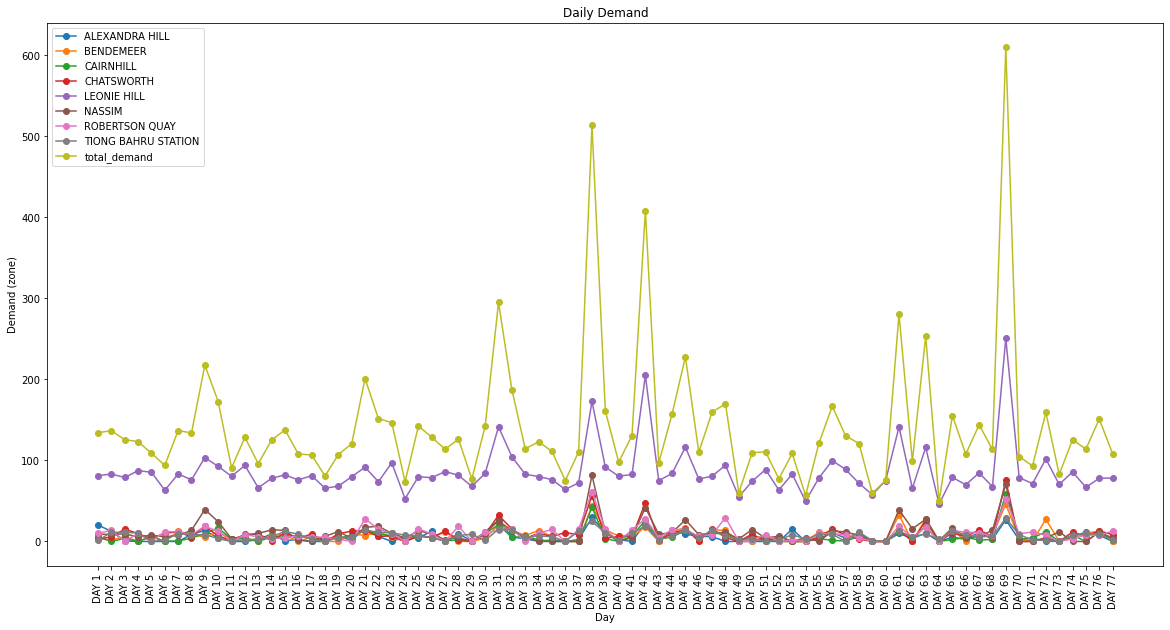

In [25]:
#Line plot of daily demand by different zone
fig, ax1 = plt.subplots(figsize = (20, 10))
ax1.set_xlabel('Day')
ax1.set_ylabel('Demand (zone)')
ax1.set_title('Daily Demand')

for i in range(9):
    ax1.plot_date(all_df.index, all_df[zone1[i]], linestyle = 'solid', label = zone1[i])
plt.legend()
plt.xticks(rotation = 90)
plt.show()

#### #1: Demand in Leonie Hill is much higher than the other zones. 

In [39]:
#boxplot of different zone
plt.figure(figsize=(15,6), dpi=1500)
sns.boxplot(x="variable", y="value", data=pd.melt(all_df[zone2]))
plt.xlabel('Zone', fontsize=11)
plt.ylabel('Daily Demand', fontsize=11)
plt.show()

#### Take away Leonie Hill

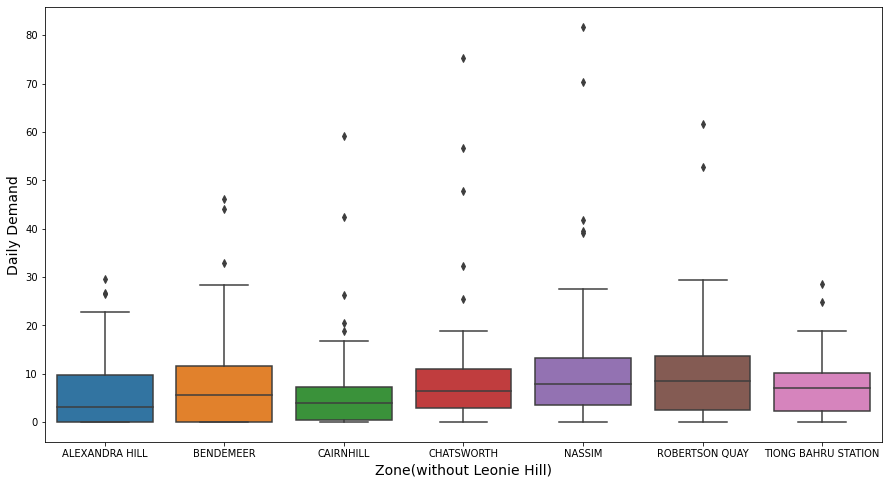

In [8]:
#boxplot of different zone
plt.figure(figsize=(15,8))
sns.boxplot(x="variable", y="value", data=pd.melt(all_df[zone3]))
plt.xlabel('Zone(without Leonie Hill)', fontsize=14)
plt.ylabel('Daily Demand', fontsize=14)
plt.show()

#### #2: Excluding Leonie Hill, the demand of the other zones are more or less similar. 

#### Percentage plot by zone

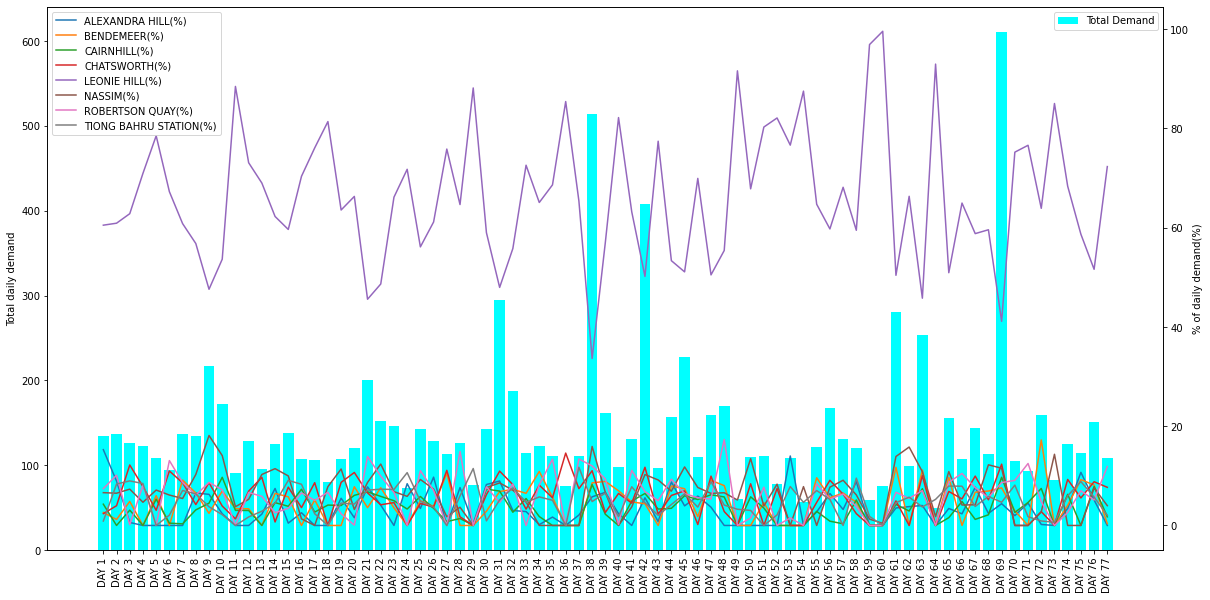

In [9]:
#x_axis
x_ax = list(all_df.index)

# From raw value to percentage
totals = [a+b+c+d+e+f+g+h for a,b,c,d,e,f,g,h in zip(all_df['ALEXANDRA HILL'], all_df['BENDEMEER'],all_df['CAIRNHILL'],all_df['CHATSWORTH'],all_df['LEONIE HILL'],all_df['NASSIM'],all_df['ROBERTSON QUAY'],all_df['TIONG BAHRU STATION'])]
a = [i / j * 100 for i,j in zip(all_df['ALEXANDRA HILL'], totals)]
b = [i / j * 100 for i,j in zip(all_df['BENDEMEER'], totals)]
c = [i / j * 100 for i,j in zip(all_df['CAIRNHILL'], totals)]
d = [i / j * 100 for i,j in zip(all_df['CHATSWORTH'], totals)]
e = [i / j * 100 for i,j in zip(all_df['LEONIE HILL'], totals)]
f = [i / j * 100 for i,j in zip(all_df['NASSIM'], totals)]
g = [i / j * 100 for i,j in zip(all_df['ROBERTSON QUAY'], totals)]
h = [i / j * 100 for i,j in zip(all_df['TIONG BAHRU STATION'], totals)]

# plot
fig, ax1 = plt.subplots(figsize = (20, 10))
ax1.set_ylabel('Total daily demand') 
ax1.bar(x_ax, all_df['total_demand'], label='Total Demand', color='cyan')
plt.legend()
plt.xticks(rotation=90)

ax2 = ax1.twinx()
ax2.plot(x_ax, a, label='ALEXANDRA HILL(%)')
ax2.plot(x_ax, b, label='BENDEMEER(%)')
ax2.plot(x_ax, c, label='CAIRNHILL(%)')
ax2.plot(x_ax, d, label='CHATSWORTH(%)')
ax2.plot(x_ax, e, label='LEONIE HILL(%)')
ax2.plot(x_ax, f, label='NASSIM(%)')
ax2.plot(x_ax, g, label='ROBERTSON QUAY(%)')
ax2.plot(x_ax, h, label='TIONG BAHRU STATION(%)')
ax2.set_ylabel('% of daily demand(%)')
plt.legend()
plt.xticks(rotation=90)

# Custom axis
plt.xlabel("Day")

# Show graphic
plt.show()


#### #3: Leonie Hill accounts for around 60% of daily demand. 

However, one apparently interesting finding is that when daily demand is at spike, the percentage contribution of Leonie Hill drops significantly.

It is suggested that when there is demand surge , the demand increases (%) of Leonie Hill is smaller than those of the other zones.

And next we would like to figure out the reason for demand surge (i.e. weather condition).

### Impact of weather (rainy or not)

#### Relationship between rain duration and rain amount within station

In [10]:
corr1 = all_df['S08_Rain_Duration'].corr(all_df['S08_Rain_Amount'])
corr2 = all_df['S107_Rain_Duration'].corr(all_df['S107_Rain_Amount'])
corr3 = all_df['S108_Rain_Duration'].corr(all_df['S108_Rain_Amount'])
corr4 = all_df['S78_Rain_Duration'].corr(all_df['S78_Rain_Amount'])
corr5 = all_df['S79_Rain_Duration'].corr(all_df['S79_Rain_Amount'])
corr6 = all_df['S88_Rain_Duration'].corr(all_df['S88_Rain_Amount'])

print('S08_station: '+ str(corr1))
print('S107_station: '+ str(corr2))
print('S108_station: '+ str(corr3))
print('S78_station: '+ str(corr4))
print('S79_station: '+ str(corr5))
print('S88_station: '+ str(corr6))

S08_station: 0.8569145647331214
S107_station: 0.6571833025349616
S108_station: 0.5055609047010257
S78_station: 0.7892766393222341
S79_station: 0.8664079917893557
S88_station: 0.7838464187698768


#### All correlations are positive and this result is obvious, such that the longer the rain duration, the higher the rain amount is collected. 

#### Rain Intensity (heavy or light rain? )

In [11]:
# Here we assume the rain intensity can be measured by rain amount divided by rain duration
all_df['S08_Rain_Intensity'] = all_df['S08_Rain_Amount'] / all_df['S08_Rain_Duration']
all_df['S107_Rain_Intensity'] = all_df['S107_Rain_Amount'] / all_df['S107_Rain_Duration']
all_df['S108_Rain_Intensity'] = all_df['S108_Rain_Amount'] / all_df['S108_Rain_Duration']
all_df['S78_Rain_Intensity'] = all_df['S78_Rain_Amount'] / all_df['S78_Rain_Duration']
all_df['S79_Rain_Intensity'] = all_df['S79_Rain_Amount'] / all_df['S79_Rain_Duration']
all_df['S88_Rain_Intensity'] = all_df['S88_Rain_Amount'] / all_df['S88_Rain_Duration']

all_df['S08_Rain_Intensity'] = all_df['S08_Rain_Intensity'].fillna(0)
all_df['S107_Rain_Intensity'] = all_df['S107_Rain_Intensity'].fillna(0)
all_df['S108_Rain_Intensity'] = all_df['S108_Rain_Intensity'].fillna(0)
all_df['S78_Rain_Intensity'] = all_df['S78_Rain_Intensity'].fillna(0)
all_df['S79_Rain_Intensity'] = all_df['S79_Rain_Intensity'].fillna(0)
all_df['S88_Rain_Intensity'] = all_df['S88_Rain_Intensity'].fillna(0)

In [12]:
# add columns for average daily rain amount, average rain duration, average rain intensity
all_df['avg_Rain_Amount'] = all_df.iloc[:, 14:20].mean(axis=1)
all_df['avg_Rain_Duration'] = all_df.iloc[:, 8:14].mean(axis=1)
all_df['avg_Rain_Intensity'] = all_df.iloc[:, 21:27].mean(axis=1)
all_df['avg_Rain_Intensity'] = all_df['avg_Rain_Intensity'].fillna(0)

In [13]:
#normalising rain amount,  duration, rain intensity

min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(all_df[['avg_Rain_Amount']].values.astype(float))
all_df['avg_rain_amount_norm'] = x_scaled

x_scaled = min_max_scaler.fit_transform(all_df[['avg_Rain_Duration']].values.astype(float))
all_df['avg_rain_duration_norm'] = x_scaled

x_scaled = min_max_scaler.fit_transform(all_df[['avg_Rain_Intensity']].values.astype(float))
all_df['avg_rain_intensity_norm'] = x_scaled

#### How rain impacts the demand

##### Overall Total Demand

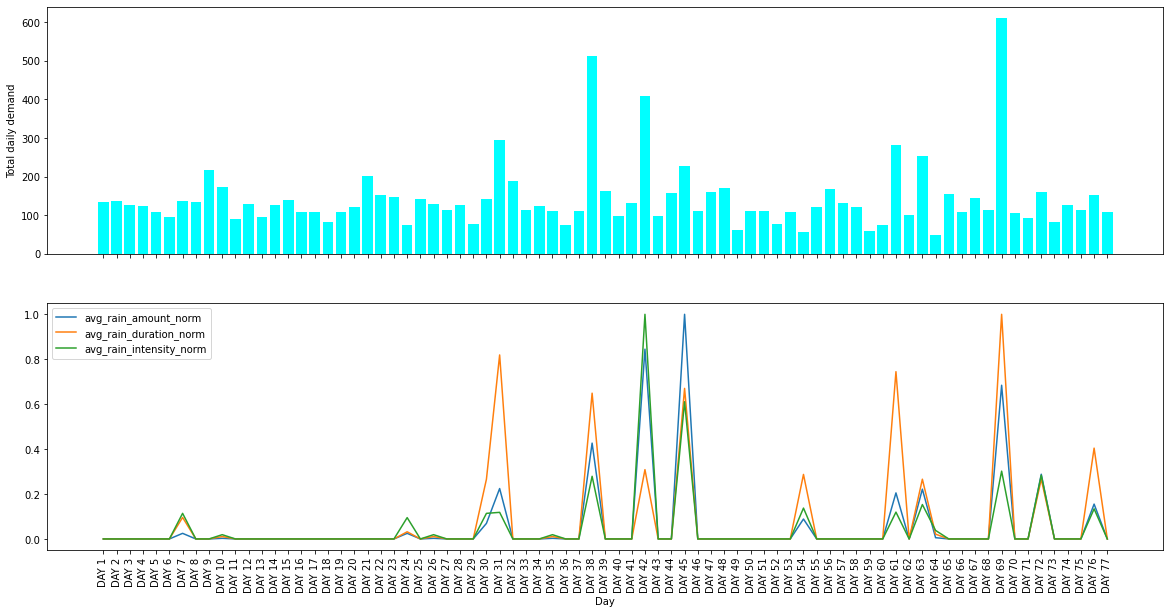

In [14]:
#overall impact
# plot
fig, (ax1,ax2) = plt.subplots(2, sharex=True, figsize = (20, 10))
ax1.set_ylabel('Total daily demand') 
ax1.bar(x_ax, all_df['total_demand'], label='Total Demand', color='cyan')
plt.xticks(rotation=90)

ax2.plot(x_ax, all_df['avg_rain_amount_norm'], label='avg_rain_amount_norm')
ax2.plot(x_ax, all_df['avg_rain_duration_norm'], label='avg_rain_duration_norm')
ax2.plot(x_ax, all_df['avg_rain_intensity_norm'], label='avg_rain_intensity_norm')
plt.legend()
plt.xticks(rotation=90)

# Custom axis
plt.xlabel("Day")

# Show graphic
plt.show()

In [15]:
corr1 = all_df['total_demand'].corr(all_df['avg_rain_amount_norm'])
corr2 = all_df['total_demand'].corr(all_df['avg_rain_duration_norm'])
corr3 = all_df['total_demand'].corr(all_df['avg_rain_intensity_norm'])


print('avg_rain_amount_norm: '+ str(corr1))
print('avg_rain_duration_norm: '+ str(corr2))
print('avg_rain_intensity_norm: '+ str(corr3))

avg_rain_amount_norm: 0.7263729112755696
avg_rain_duration_norm: 0.7785847211556002
avg_rain_intensity_norm: 0.6112653263574492


#### In overall term, raining would increase the demand for taxi. 
Rain Duration (Orange line) may be a critical reason for the demand surge, suggesting that when people observe a longer raining time from 7am to 8pm, they might be more inclined to take a taxi during 8am to 8:15am. 

#### Impact on each zone

In [40]:
#Correlation matrix / correlation heatmap
corrMatrix = all_df.corr()
#Trim column and rows
order = (['S08_Rain_Duration', 'S08_Rain_Amount', 'S107_Rain_Duration', 'S107_Rain_Amount', 
           'S108_Rain_Duration', 'S108_Rain_Amount', 'S78_Rain_Duration', 'S78_Rain_Amount',  
           'S79_Rain_Duration', 'S79_Rain_Amount', 'S88_Rain_Duration', 'S88_Rain_Amount'])

subset = corrMatrix.loc[zone2, order]

fig, ax = plt.subplots(figsize=(15,8), dpi=2000) 
sns.heatmap(subset, 
        xticklabels=order,
        yticklabels=zone2,
        cmap='BrBG',
        annot=True, ax = ax)

<AxesSubplot:>

##### Referring to the above heatmap, it seems that the weather data in S08, s78, s79 and s88 is more relevant to the zone demand than those data in S107 and S108 station.

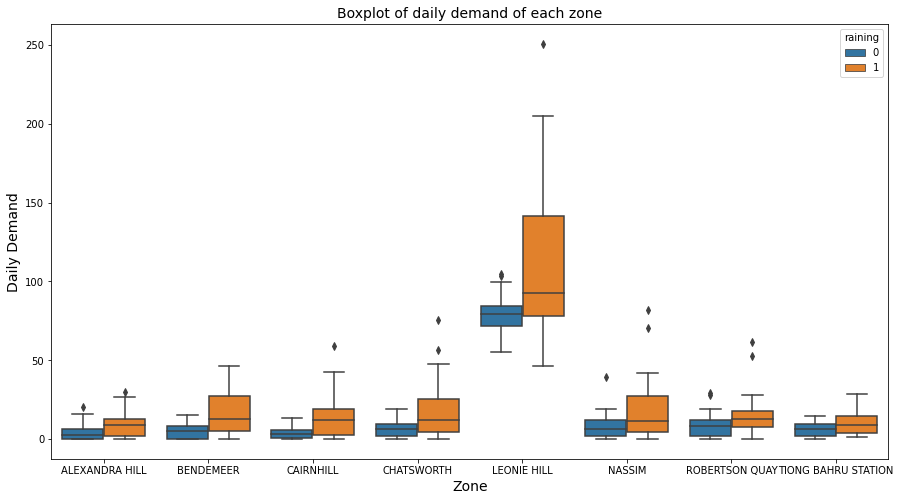

In [17]:
#Box plot for each zone with raining or not considered

#Add columns 'raining' with 0 = absolutely no rainy and 1 = with rain in any station
conditions = [(all_df['avg_Rain_Amount'] == 0), (all_df['avg_Rain_Amount'] > 0)]
values = [0,1]
all_df['raining'] = np.select(conditions, values)

#data for boxplot
all_df_melt_1 = pd.melt(all_df[zone2])
abc = list(all_df['raining'])* 8
all_df_melt_1['raining'] = abc


#Plot 
plt.figure(figsize=(15,8))
sns.boxplot(x="variable", y="value", data=all_df_melt_1, hue='raining')
plt.xlabel('Zone', fontsize=14)
plt.ylabel('Daily Demand', fontsize=14)
plt.title('Boxplot of daily demand of each zone', fontsize=14)
plt.show()

##### In general, raining increases the demand in every zone. 

##### Back to the finding above, we want to see how raining affects the demand share % of each zone.

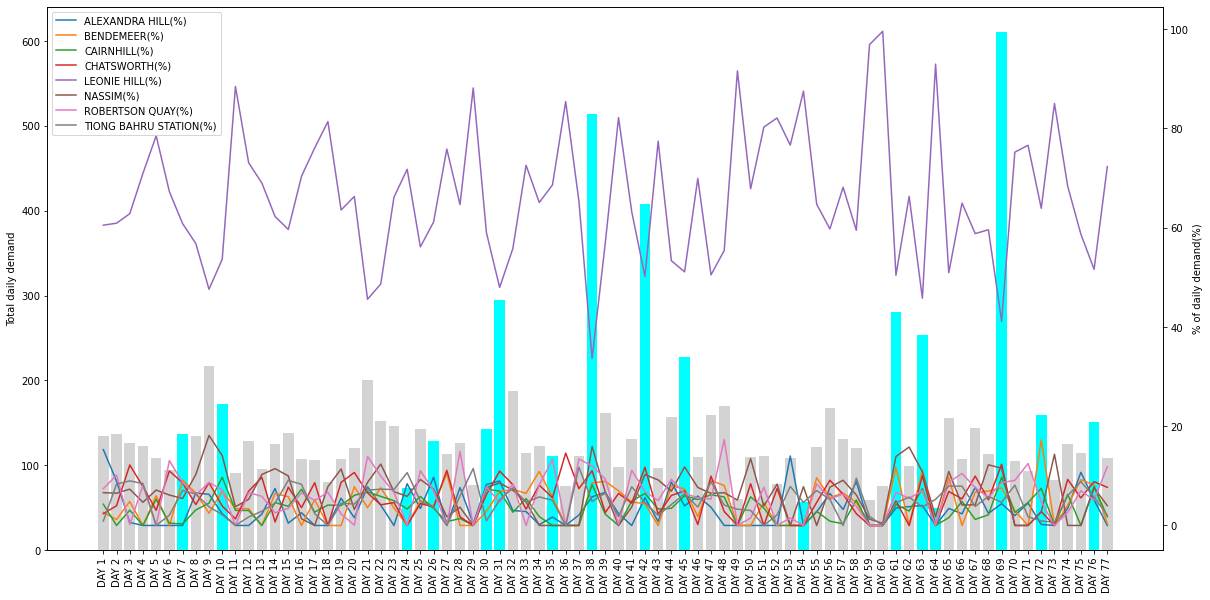

In [18]:
#x_axis
x_ax = list(all_df.index)

# From raw value to percentage
totals = [a+b+c+d+e+f+g+h for a,b,c,d,e,f,g,h in zip(all_df['ALEXANDRA HILL'], all_df['BENDEMEER'],all_df['CAIRNHILL'],all_df['CHATSWORTH'],all_df['LEONIE HILL'],all_df['NASSIM'],all_df['ROBERTSON QUAY'],all_df['TIONG BAHRU STATION'])]
a = [i / j * 100 for i,j in zip(all_df['ALEXANDRA HILL'], totals)]
b = [i / j * 100 for i,j in zip(all_df['BENDEMEER'], totals)]
c = [i / j * 100 for i,j in zip(all_df['CAIRNHILL'], totals)]
d = [i / j * 100 for i,j in zip(all_df['CHATSWORTH'], totals)]
e = [i / j * 100 for i,j in zip(all_df['LEONIE HILL'], totals)]
f = [i / j * 100 for i,j in zip(all_df['NASSIM'], totals)]
g = [i / j * 100 for i,j in zip(all_df['ROBERTSON QUAY'], totals)]
h = [i / j * 100 for i,j in zip(all_df['TIONG BAHRU STATION'], totals)]

# plot

clrs = ['lightgrey' if (x == 0) else 'cyan' for x in all_df['raining'] ]
fig, ax1 = plt.subplots(figsize = (20, 10))
ax1.set_ylabel('Total daily demand') 
ax1.bar(x_ax, all_df['total_demand'], label='Total Demand', color=clrs)
plt.xticks(rotation=90)

ax2 = ax1.twinx()
ax2.plot(x_ax, a, label='ALEXANDRA HILL(%)')
ax2.plot(x_ax, b, label='BENDEMEER(%)')
ax2.plot(x_ax, c, label='CAIRNHILL(%)')
ax2.plot(x_ax, d, label='CHATSWORTH(%)')
ax2.plot(x_ax, e, label='LEONIE HILL(%)')
ax2.plot(x_ax, f, label='NASSIM(%)')
ax2.plot(x_ax, g, label='ROBERTSON QUAY(%)')
ax2.plot(x_ax, h, label='TIONG BAHRU STATION(%)')
ax2.set_ylabel('% of daily demand(%)')
plt.legend()
plt.xticks(rotation=90)

# Custom axis
plt.xlabel("Day")

# Show graphic
plt.show()

#### Light blue bar means a raining day while grey bar means a non-raining day. 
We may observe that in a rainy day (and hence total demand increases), the demand share % of Leonie Hill usually drops. 